In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train.csv")
df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df[["#posts"]]
y = df[["#followers"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

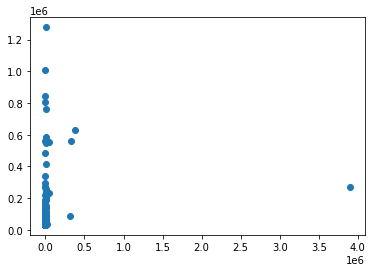

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


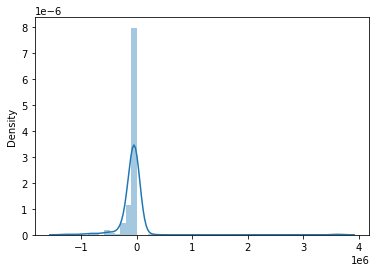

In [ ]:
sns.distplot((y_test-predictions),bins=50);


In [ ]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 111275.57335620298
MSE: 90864234921.15613
RMSE: 301436.95015899447


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)
y_pred


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([  890969,   890969,        0,   890969,   890969,   890969,
         890969,   890969,        0,   890969,      744,        0,
         890969,        0,   890969,   890969,        0,      744,
         890969,   890969,        0,        0,        0,        0,
         890969,   890969,   890969,        0,   890969,   890969,
         890969,   890969,   890969,   890969,   890969,   890969,
              0,   890969,   890969,   890969, 12397719, 12397719,
              0,        0,   890969,   890969,   890969,   890969,
         890969,      744,   890969,   890969,   890969,        0,
              0,   890969,        0,   890969,   890969,      744,
         890969,   890969,   890969,   890969,   890969,   890969,
       12397719,   890969,   890969,        0,        0,    18515,
         890969,        0,   890969,    18515,   890969,   890969,
         890969,   890969,        0,      744,        0, 12397719,
              0,        0,   890969,   890969,   890969,      

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average="micro"))
print("Recall:",metrics.recall_score(y_test, y_pred, average="micro"))

Accuracy: 0.03896103896103896
Precision: 0.03896103896103896
Recall: 0.03896103896103896


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([     201,      106,        0,      193,        5,       40,
             40,     1456,        0,      177,        1,        0,
           3551,        0,    27477,       96,        0,        1,
            193,      201,        0,        0,        0,        0,
           7217,       38,     1068,        0,       40,      748,
            158,       96,      195,       38,  5315651,      414,
              0,      759,        7,     1057,        1,        1,
              0,        0,      722,       70,      265,     1057,
            272,        1,      414,      404,      404,        0,
              0,     2756,        0,      404,      414,        1,
            229,     1057,        8,      404,       59,      668,
              1,        5,      722,        0,        0,       34,
            802,        0,      193,       34,   542073,      505,
            456,    19512,        0,        1,        0,       18,
              0,        0,     3003,       45,       38,      

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
# fit the model with the training data
model.fit(X_train,y_train)
print('Number of Trees used : ', model.n_estimators)
# predict the target on the train dataset
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)

<ipython-input-70-c92fc784835b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


Number of Trees used :  100

Target on train data [       0       59        0      195     5863      722        0     1358
      105        1   542073        1    34670        0        0     2118
    31182        0      265      812      228      316    39867      815
      167       59      309        1        0        0   669987      505
        1       70        0      159      427     1152        0       38
      417      159      166        0        1      229       37      711
      228      143      267      984      490        0        0       87
     2756        0      802    19512      417       96        0      494
      244        1        0        0      228      622        1      105
      228       18      606        0      539      158     8578        0
     2719        0        0      133        0        1       37        0
       34      228      105        0       34        0        0    27477
       34      428      446      316       34        1      494       59
 

In [ ]:
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)
# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 


accuracy_score on train dataset :  0.42028985507246375

Target on test data [     358      106        0      446       59      105      105     1456
        0      834        1        0     3551        0    27477       96
        0        1      446      358        0        0        0        0
     7217       38     1068        0      105      748      158       96
      195       38  5315651      414        0      759      228     1057
       37       37        0        0      722       70      265     1057
      272        1      414      404      404        0        0     2756
        0      404      414        1      229     1057        8      404
      159      815       37       59      722        0        0       34
      802        0      446       34   542073      505      738    19512
        0        1        0       18        0        0     3003      617
       38        0        1     2598      428    91446      272       18
      228      195       34      335     1204  

In [ ]:
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)



accuracy_score on test dataset :  0.047619047619047616


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([  56,   60,   15,   60,    5,   40,   40,  229,   15,  177,    3,
         15,  399,   15,  744,    0,   15,    3,   47,   56,   15,   15,
         15,   15,  139,   38,  195,   15,   40,  414,   65,    0,  109,
         38, 2338,  414,   15,  346,    7,  346,   21,   21,   15,   15,
        272,   70,  265,  346,  272,    3,  414,  404,  404,   15,   15,
        139,   15,  404,  414,    3,  229,  346,    8,  404,   59,  106,
         21,    5,  272,   15,   15,   12,  265,   15,   47,   12, 2719,
          8,  186,  414,   15,    3,   15,   18,   15,   15, 1267,   45,
         38,   15,    3,  272,  178, 2338,  272,   18,    7,  109,   12,
         82,    8,  109,   15,  166,   15,  143,   15,  167,   15,   65,
        167,  133, 2719,  537,   15,    8,    7,  272,   15,  177,   15,
        109,   15,   15,   21,  244,   15,  272,   12,   15,   59,   15,
         15,   15,   15,  244,   15,  244,  622,    7,   18,   15,   15,
         21, 1267,   15,   15,   82,   15,  265,  4